In [1]:
!pip install notebook

  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_client-8.6.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached Send2Trash-1.8.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached terminado-0.18.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached tomli-2.2.1-py3-none-any.whl.metadata (10 kB)
  Using cached babel-2.17.0-py3-none-any.whl.metadata (2.0 kB)
  Using cached json5-0.12.0-py3-none-any.whl.metadata (36 kB)
  Using cached argon2_cffi_bindings-21.2.0-cp36-abi3-man

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

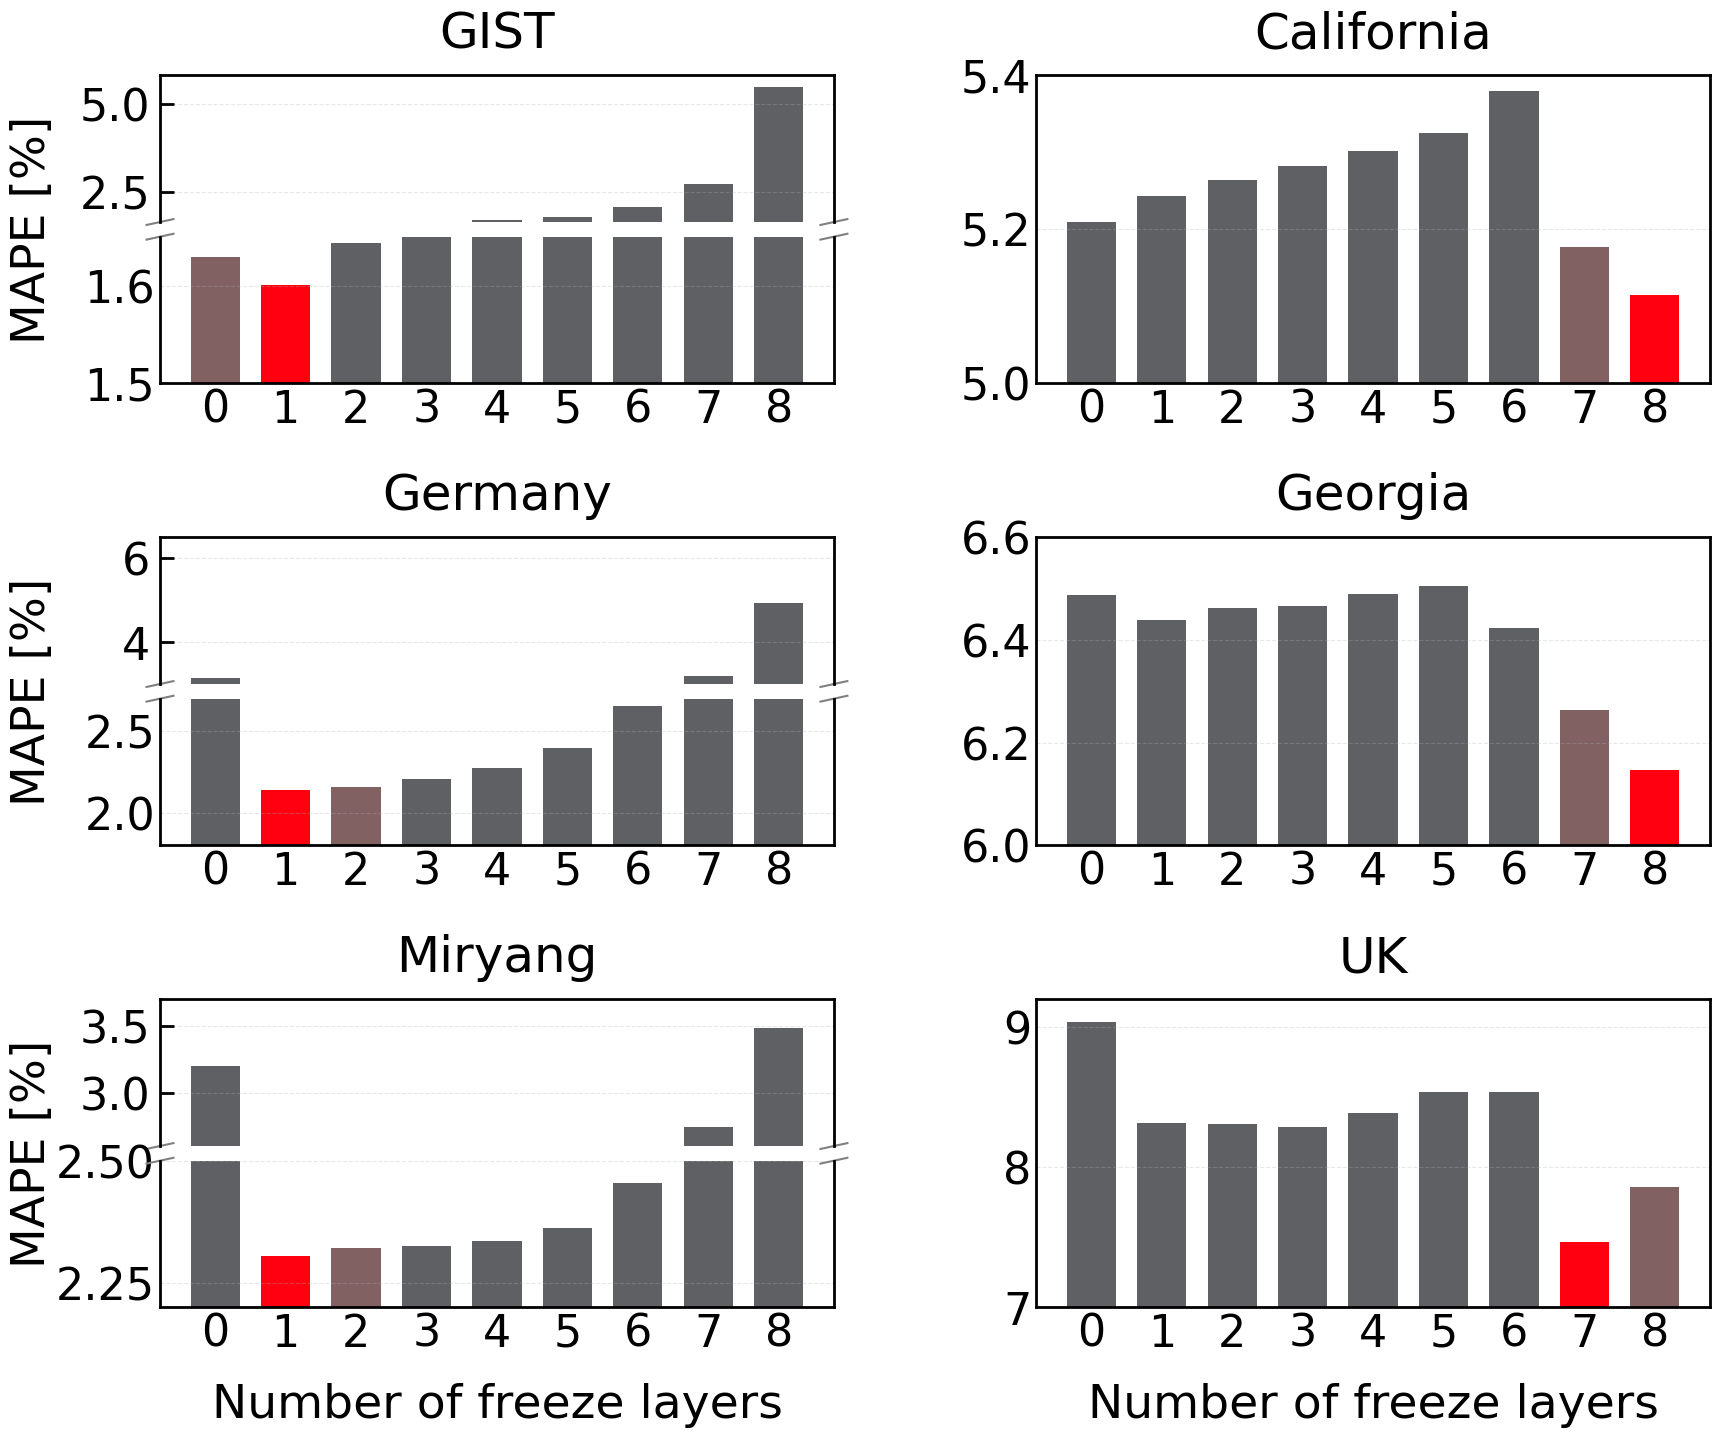

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

def create_subplot_with_broken_axis(fig, gs, data, title, break_points, y_ranges, show_ylabel=True, show_xlabel=False, fontsize=40, title_offset=2, tick_offset=-2):
    """
    서브플롯을 생성하고 필요한 경우 축을 끊어서 표현하는 함수
    
    Parameters:
        fig (Figure): matplotlib figure 객체
        gs (GridSpec): GridSpec 객체
        data (list): 그래프에 표시할 데이터
        title (str): 서브플롯 제목
        break_points (list): 축을 끊을 지점
        y_ranges (list): y축의 범위
        show_ylabel (bool): y축 레이블 표시 여부
        show_xlabel (bool): x축 레이블 표시 여부
        fontsize (int): 폰트 크기
    """
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    x = np.arange(len(categories))
    width = 0.7
    
    # 색상 할당
    colors = assign_highlight_colors(data)
    
    # 막대 그래프 그리기
    for i, (value, color) in enumerate(zip(data, colors)):
        ax1.bar(x[i], value, width, color=color)
        ax2.bar(x[i], value, width, color=color)
    
    # 테두리 굵기 설정
    for spine in ax1.spines.values():
        spine.set_linewidth(2)
    for spine in ax2.spines.values():
        spine.set_linewidth(2)

    # y축 범위 설정
    ax1.set_ylim(y_ranges[1])
    ax2.set_ylim(y_ranges[0])
    
    # 축이 끊어진 표시 추가
    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax1.tick_params(labeltop=False, labelbottom=False, top=False, bottom=False)
    ax1.tick_params(direction='in', length=10, width=2, pad=7)
    
    # 끊어진 부분 표시
    d = 0.02
    kwargs = dict(transform=ax1.transAxes, color='gray', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
    
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
    ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    
    # 제목 설정
    ax1.set_title(title, pad=20, fontsize=fontsize+title_offset)
    
    # y축 레이블
    if show_ylabel:
        x_pos, y_pos = calculate_mape_position(fig, [ax1, ax2])
        fig.text(x_pos, y_pos, 'MAPE [%]', rotation=90, va='center', fontsize=fontsize)
    
    # x축 설정
    ax2.set_xticks(x)
    ax2.set_xticklabels(categories, rotation=0, ha='center', fontsize=fontsize+tick_offset)
    ax2.tick_params(length=0)  # 눈금 제거
    
    if show_xlabel:
        ax2.set_xlabel("Number of freeze layers", fontsize=fontsize, labelpad=20)
    
    # 그리드 추가
    ax1.yaxis.grid(True, linestyle='--', alpha=0.3, zorder=0)
    ax2.yaxis.grid(True, linestyle='--', alpha=0.3, zorder=0)
    
    # tick 폰트 크기 설정
    ax1.tick_params(axis='y', labelsize=fontsize+tick_offset)
    ax2.tick_params(axis='both', labelsize=fontsize+tick_offset)

def create_normal_subplot(ax, data, title, y_range, show_ylabel=True, show_xlabel=False, fontsize=40, title_offset=2, tick_offset=-2):
    """일반 서브플롯 생성 함수"""
    x = np.arange(len(categories))
    colors = assign_highlight_colors(data)
    
    for i, (value, color) in enumerate(zip(data, colors)):
        ax.bar(x[i], value, width=0.7, color=color)
    
    for spine in ax.spines.values():
        spine.set_linewidth(2)

    ax.set_title(title, pad=20, fontsize=fontsize+title_offset)
    
    if show_ylabel:
        x_pos, y_pos = calculate_mape_position(fig, ax)
        fig.text(x_pos, y_pos, 'MAPE [%]', rotation=90, va='center', fontsize=fontsize)
    
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=0, ha='center', fontsize=fontsize+tick_offset)
    
    if show_xlabel:
        ax.set_xlabel("Number of freeze layers", fontsize=fontsize, labelpad=20)
    
    ax.tick_params(length=0)  # 눈금 제거
    ax.set_ylim(y_range)
    ax.yaxis.grid(True, linestyle='--', alpha=0.3, zorder=0)
    ax.tick_params(axis='both', labelsize=fontsize+tick_offset)

def calculate_mape_position(fig, axes):
    """MAPE 레이블 위치 계산"""
    fig.canvas.draw()
    
    if isinstance(axes, list):
        ax1, ax2 = axes
        bbox1 = ax1.get_position()
        bbox2 = ax2.get_position()
        y_pos = (bbox1.y0 + bbox1.y1 + bbox2.y0 + bbox2.y1) / 4
    else:
        bbox = axes.get_position()
        y_pos = bbox.y0 + bbox.height / 2
    
    return 0.05, y_pos

def assign_highlight_colors(data):
    """최소값 강조 색상 할당"""
    sorted_indices = np.argsort(data)
    min_idx = sorted_indices[0]
    second_min_idx = sorted_indices[1]
    
    colors = ['#5E6064'] * len(data)
    colors[second_min_idx] = "#826163FF"
    colors[min_idx] = "#FF0011"
    
    return colors

def create_freeze_layers_plot(fontsize=40):
    """전체 그래프 생성 함수"""
    plt.style.use('default')
    plt.rcParams['font.family'] = 'Times New Roman'
    
    fig = plt.figure(figsize=(20, 16))
    outer_grid = gridspec.GridSpec(3, 2, figure=fig, hspace=0.5, wspace=0.3)
    
    for idx, region in enumerate(plot_order):
        settings = plot_settings[region]
        values = data[region]
        show_ylabel = idx % 2 == 0
        show_xlabel = idx >= len(plot_order) - 2
        
        if settings['break_points']:
            inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                        subplot_spec=outer_grid[idx],
                                                        height_ratios=[1, 1],
                                                        hspace=0.1)
            create_subplot_with_broken_axis(fig, inner_grid, values, region,
                                          settings['break_points'],
                                          settings['y_ranges'],
                                          show_ylabel,
                                          show_xlabel,
                                          fontsize)
        else:
            ax = fig.add_subplot(outer_grid[idx])
            create_normal_subplot(ax, values, region, settings['y_ranges'][0],
                                show_ylabel, show_xlabel, fontsize)
    
    return fig

# 데이터 및 설정
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
data = {
    'GIST': [1.6293, 1.6008, 1.6438, 1.6514, 1.7037, 1.8012, 2.0653, 2.7289, 5.4627],
    'Germany': [3.143, 2.1378, 2.1593, 2.2060, 2.2770, 2.3981, 2.6558, 3.1809, 4.9441],
    'Miryang': [3.1986, 2.3044, 2.3204, 2.3256, 2.3348, 2.3628, 2.4544, 2.7459, 3.4867],
    'California': [5.2096, 5.2434, 5.2638, 5.2827, 5.3013, 5.3254, 5.3791, 5.1777, 5.1154],
    'Georgia': [6.4877, 6.4395, 6.463, 6.4671, 6.49, 6.506, 6.4227, 6.2644, 6.1461],
    'UK': [9.0415, 8.3173, 8.308, 8.2876, 8.3863, 8.5353, 8.5398, 7.4664, 7.8598]
}

plot_settings = {
    'GIST': {
        'break_points': [1.65, 1.65],
        'y_ranges': [(1.5, 1.65), (1.65, 5.8)]
    },
    'Germany': {
        'break_points': [2.8, 3.0],
        'y_ranges': [(1.8, 2.7), (3.0, 6.5)]
    },
    'Miryang': {
        'break_points': [2.5, 2.6],
        'y_ranges': [(2.2, 2.5), (2.6, 3.7)]
    },
    'California': {
        'break_points': None,
        'y_ranges': [(5.0, 5.4)]
    },
    'Georgia': {
        'break_points': None,
        'y_ranges': [(6.0, 6.6)]
    },
    'UK': {
        'break_points': None,
        'y_ranges': [(7, 9.2)]
    }
}

plot_order = ['GIST', 'California', 'Germany', 'Georgia', 'Miryang', 'UK']

if __name__ == "__main__":
    fig = create_freeze_layers_plot(fontsize=34)
    plt.show()
    # plt.savefig('freeze_layers_plot.pdf', bbox_inches='tight', dpi=300)

In [16]:
import plotly.graph_objects as go

# Sample data
sites = ["GIST", "Germany", "Miryang", "California", "Georgia", "UK"]
methods = ["Fine-Tuning", "Linear Probing", "Zero-Shot", "Target-Only"]
data = [
    [1.6008, 5.3760, 6.1270, 2.1434],  # GIST
    [2.1378, 4.9441, 6.2408, 3.1430],  # Germany
    [2.3044, 3.4867, 3.7475, 3.1991],  # Miryang
    [5.1154, 5.1154, 5.2956, 5.2644],  # California
    [6.1461, 6.1396, 6.1932, 6.6276],  # Georgia
    [7.4664, 7.8598, 8.6286, 9.0415]   # UK
]

# Custom colors and patterns
method_colors = [
    # "rgb(179, 26, 35)",     # Adrenaline Rush for Fine-Tuning
    # "rgb(117, 81, 57)",     # Toffee for Linear Probing
    # "rgb(92, 44, 53)",      # Tawny Port for Zero-Shot
    # "rgb(16, 59, 88)"       # Blue Opal for Target-Only

    "rgb(255, 0, 0)",     # Adrenaline Rush for Fine-Tuning
    "rgb(117, 81, 57)",     # Toffee for Linear Probing
    "rgb(92, 44, 53)",      # Tawny Port for Zero-Shot
    "rgb(16, 59, 88)"       # Blue Opal for Target-Only
]
method_patterns = ["", "/", ".", "\\"]  # No pattern, diagonal stripe, reverse diagonal, dotted

# Initialize figure
fig = go.Figure()

# Add bars with patterns
for i, method in enumerate(methods):
    fig.add_trace(go.Bar(
        x=sites,
        y=[row[i] for row in data],
        name=method,
        marker=dict(
            color=method_colors[i],
            pattern_shape=method_patterns[i],
            pattern_size=6  # Smaller pattern size
        )
    ))

# Update layout
fig.update_layout(
    xaxis=dict(
        title="Site Name",
        titlefont=dict(family="Times New Roman", size=26),
        tickfont=dict(family="Times New Roman", size=22),
        showline=True,  # Add border line to x-axis
        linewidth=2,
        linecolor="black",
        mirror=True  # Add top border
    ),
    yaxis=dict(
        title="MAPE [%]",
        titlefont=dict(family="Times New Roman", size=26),
        tickfont=dict(family="Times New Roman", size=22),
        showline=True,  # Add border line to y-axis
        linewidth=2,
        linecolor="black",
        ticks="inside",  # Add ticks inside the graph
        tickwidth=2,
        tickcolor="black",
        tickmode="array",  # Use custom tick values
        tickvals=[1, 3, 5, 7, 9],  # Specify tick positions
        ticktext=["1", "3", "5", "7", "9"],  # Tick labels
        mirror=True,  # Add right border
    ),
    legend=dict(
        font=dict(family="Times New Roman", size=22),  # Legend font
        orientation="h",
        bordercolor="black",  # Add border around legend
        borderwidth=2,
        x=0.5,  # Position legend inside the graph
        y=1.005,
        xanchor="center",
        yanchor="top",
        bgcolor="white",    # Background color for legend box
        itemsizing="constant",
        itemwidth=30,
        traceorder="normal",
        tracegroupgap=0,  # 그룹 간 간격을 0으로 설정
        yref="paper",



    ),
    barmode="group",
    template="plotly_white",
    width=900,
    height=500
)

# Add outer border to the entire graph
fig.update_layout(
    margin=dict(l=50, r=50, t=70, b=50),
    paper_bgcolor="white",
    plot_bgcolor="white",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    font=dict(
        family="Times New Roman",
        size=18,
        color="black"  # 전체 글씨를 검은색으로 설정
    )
)

fig.show()


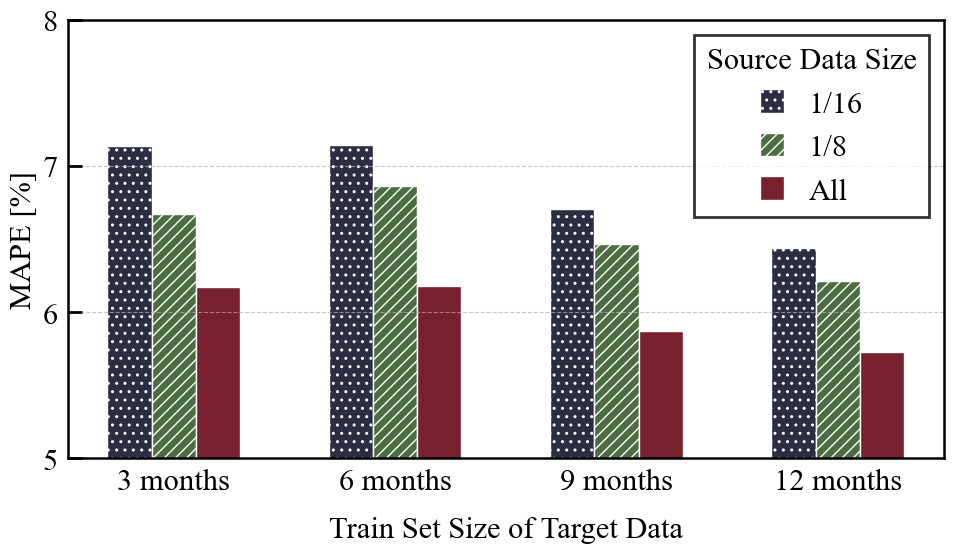

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Data
months = ['3 months', '6 months', '9 months', '12 months']
data_1_16 = [7.1363, 7.1455, 6.7053, 6.4413]
data_1_8 = [6.6736, 6.8629, 6.468, 6.2141]
data_entire = [6.1724, 6.1783, 5.8742, 5.7292]

# Set width of each bar and positions of bars
width = 0.2
x = np.arange(len(months))

# Create figure and axis
plt.figure(figsize=(10, 6))
plt.style.use('default')
plt.rcParams['font.size'] = 22  
plt.rcParams['font.family'] = 'Times New Roman'

# 패턴 크기 조절
plt.rcParams['hatch.linewidth'] = 1  # 패턴의 선 두께
plt.rcParams['hatch.color'] = 'white'  # 패턴 색상
# plt.rcParams['hatch.density'] = 4  # 점의 밀도 - 값이 클수록 더 조밀

plt.bar(x - width, data_1_16, width, label='1/16', color='#2B2E43',     #D6C69A #BEBDBD #2B2E43
        hatch='..', edgecolor='white')  # 점 패턴
plt.bar(x, data_1_8, width, label='1/8', color='#4B6D41',       #595F34 #103B58 #4B6D41
        hatch='///', edgecolor='white')  # 대각선 패턴
plt.bar(x + width, data_entire, width, label='All', color="#77202E", #282D3C #B31A23 #77202E
        edgecolor='white')

# Customize plot
plt.ylabel('MAPE [%]')
plt.xlabel('Train Set Size of Target Data', labelpad=15)
# plt.title('GIST')
plt.xticks(x, months)
plt.tick_params(axis='y', direction='in', length=10, width=2, pad=7)
plt.tick_params(axis='x', bottom=False)

# Modify legend to use square markers
legend=plt.legend(title='Source Data Size',
          handlelength=0.8,  # 범례 마커 길이 조정
          handleheight=0.8,  # 범례 마커 높이 조정
          edgecolor='black',
          fancybox=False)  # 범례 상자를 직각으로 설정
legend.get_frame().set_linewidth(2)     # 범례 박스의 외곽선 두께 조절

# Set y-axis limits
plt.ylim(5, 8)
plt.yticks(np.arange(5, 9, 1))

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=0)

# Set spines linewidth (변의 굵기 조정)
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_linewidth(1.8)  # 원하는 굵기 설정 (예: 2)

# Adjust layout
plt.tight_layout()

# Save plots
plt.show()

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Data setup
sites_row1 = ["GIST", "Germany", "Miryang"]
sites_row2 = ["California", "Georgia", "UK"]
x_labels = ["3", "6", "9", "12"]
x_labels_UK = ["3", "6", "9"]
y_labels = ["All ", "1/8 ", "1/16 "]

data = {
    "GIST":     [[6.1724, 6.1783, 5.8742, 5.7292],
                 [6.6736, 6.8629, 6.4680, 6.2141],
                 [7.1363, 7.1455, 6.7053, 6.4413]],

    "Germany": [[7.5188, 3.8457, 2.7227, 2.7323],
                [8.0878, 4.3070, 3.0653, 3.1765],
                [8.4899, 4.6427, 3.3012, 3.4228]],


                 
                #  8.48991	4.64268	3.30118	3.42278
                # 8.08776	4.30696	3.06529	3.17646
                # 7.5188	3.84569	2.72266	2.73229


    "Miryang":  [[3.6815, 3.3182, 2.9681, 2.7572],
                 [4.0321, 3.6522, 3.3389, 3.0737],
                 [4.3548, 3.8478, 3.5435, 3.2797]],

    "California": [[5.411, 5.2759, 4.8947, 4.9451],
                   [5.8545, 5.4798, 4.9797, 5.0834],
                   [6.3624, 5.5923, 5.2748, 5.2427]],

    "Georgia":  [[6.4423, 6.1232, 5.8519, 5.8817],
                 [6.6001, 6.1299, 6.0094, 6.1892],
                 [7.5237, 7.3936, 6.3121, 6.4992]],

    "UK":       [[7.4676, 8.5057, 7.6623],
                 [8.2529, 10.478, 8.2393],
                 [8.2501, 9.7039, 8.8634]]
}

# Custom color scale
custom_colorscale = [
    (0.0, "rgb(16, 59, 88)"),       # Blue Opal
    (0.66, "rgb(106, 40, 44)"),     # Syrah
    # (1.0, "rgb(179, 26, 35)")       # Adrenaline Rush
    (1.0, "rgb(255, 0, 0)")       # Red
]

def create_heatmap(sites, row_number):
    # Create figure with 1x3 subplots
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=sites,
        horizontal_spacing=0.12
    )

    # Calculate colorbar positions
    colorbar_x = [0.25, 0.623, 0.996]

    # Add heatmaps
    for idx, site in enumerate(sites):
        col = idx + 1
        
        site_data = np.array(data[site])
        site_min = np.nanmin(site_data[site_data != None])
        site_max = np.nanmax(site_data[site_data != None])

        if site == 'GIST' or site == 'California':
            colorbar_title = 'MAPE [%]'
        else:
            colorbar_title = None

        # colorbar_title = 'MAPE [%]' if site == 'GIST' else None
        x_labels_current = x_labels_UK if site == 'UK' else x_labels
        
        fig.add_trace(
            go.Heatmap(
                z=data[site],
                x=x_labels_current,
                y=y_labels,
                colorscale=custom_colorscale,
                reversescale=True,
                text=[[f'{val:.2f}' if val is not None else '' for val in row] for row in data[site]],
                texttemplate='%{text}',
                textfont={"size": 16, "color": "white", "family": "Times New Roman"},
                showscale=True,
                colorbar=dict(
                    title=dict(
                        text=colorbar_title if colorbar_title else '',
                        font=dict(
                            family="Times New Roman",
                            size=15,
                        ),
                        side='top'
                    ),
                    x=colorbar_x[col-1],
                    y=0.89,
                    len=0.8,
                    thickness=25,
                    yanchor='top',
                    tickmode='array',
                    tickvals=[site_max, (site_min + site_max)/2, site_min],
                    ticktext=[f'{site_max:.2f}', f'{(site_min + site_max)/2:.2f}', f'{site_min:.2f}'],
                    tickfont=dict(family="Times New Roman", size=14),
                ),
                zmin=site_max,
                zmax=site_min
            ),
            row=1, col=col
        )

    # Update layout
    fig.update_layout(
        height=400,
        width=1200,
        showlegend=False,
        margin=dict(t=80, b=40),
        font=dict(
            family="Times New Roman",
            size=14,
            color="black"
        )
    )

    # Update subplot titles
    for annotation in fig.layout.annotations:
        annotation.font.update(
            family='Times New Roman',
            size=20
        )

    # Update axis labels
    for col in range(1, 4):
        fig.update_xaxes(
            tickfont=dict(size=16, family="Times New Roman"),
            row=1, col=col
        )
        fig.update_yaxes(
            tickfont=dict(size=16, family="Times New Roman"),
            row=1, col=col
        )

    # Add axis labels to the leftmost plot
    fig.update_xaxes(
        title_text='Target Dataset Length [Months]',
        title_font=dict(size=18, family="Times New Roman"),
        row=1, col=2
    )
    fig.update_yaxes(
        title_text='Source Dataset Volume',
        title_font=dict(size=18, family="Times New Roman"),
        row=1, col=1
    )

    # Save figure
    # fig.write_image(f'heatmap_row{row_number}.png', scale=4)
    return fig

# Create and save both heatmaps
fig1 = create_heatmap(sites_row1, 1)
fig2 = create_heatmap(sites_row2, 2)

# Display figures (optional)
fig1.show()
fig2.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Data setup
sites_row1 = ["GIST", "Konstanz", "Miryang"]
sites_row2 = ["California", "Georgia", "UK"]
x_labels = ["3", "6", "9", "12"]
x_labels_UK = ["3", "6", "9"]
y_labels = ["All ", "1/8 ", "1/16 "]

# Define data points for each site
data_points = {
    "GIST": 531710,
    "Konstanz": 256473,
    "Miryang": 82255,
    "California": 45699,
    "Georgia": 26547,
    "UK": 10083
}

# Create titles with data points
def create_subplot_titles(sites):
    return [f"{site}<br><span style='font-size: 18px'>({data_points[site]:,} data points)</span>" for site in sites]

data = {
    "GIST":     [[6.1724, 6.1783, 5.8742, 5.7292],
                 [6.6736, 6.8629, 6.4680, 6.2141],
                 [7.1363, 7.1455, 6.7053, 6.4413]],

    "Konstanz": [[3.3888, 3.2131, 3.3475, 3.0605],
                 [3.3241, 3.2975, 3.2998, 3.3247],
                 [3.8336, 3.7963, 3.7823, 3.7371]],

    "Miryang":  [[3.6815, 3.3182, 2.9681, 2.7572],
                 [4.0321, 3.6522, 3.3389, 3.0737],
                 [4.3548, 3.8478, 3.5435, 3.2797]],

    "California": [[5.411, 5.2759, 4.8947, 4.9451],
                   [5.8545, 5.4798, 4.9797, 5.0834],
                   [6.3624, 5.5923, 5.2748, 5.2427]],

    "Georgia":  [[6.4423, 6.1232, 5.8519, 5.8817],
                 [6.6001, 6.1299, 6.0094, 6.1892],
                 [7.5237, 7.3936, 6.3121, 6.4992]],

    "UK":       [[7.4676, 8.5057, 7.6623],
                 [8.2529, 10.478, 8.2393],
                 [8.2501, 9.7039, 8.8634]]
}

# Custom color scale
custom_colorscale = [
    (0.0, "rgb(16, 59, 88)"),       # Blue Opal
    (0.66, "rgb(106, 40, 44)"),     # Syrah
    (1.0, "rgb(179, 26, 35)")       # Adrenaline Rush
]

def create_heatmap(sites, row_number):
    # Create figure with 1x3 subplots using updated titles
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=create_subplot_titles(sites),
        horizontal_spacing=0.12
    )

    # Calculate colorbar positions
    colorbar_x = [0.25, 0.623, 0.996]

    # Add heatmaps
    for idx, site in enumerate(sites):
        col = idx + 1
        
        site_data = np.array(data[site])
        site_min = np.nanmin(site_data[site_data != None])
        site_max = np.nanmax(site_data[site_data != None])

        if site == 'GIST' or site == 'California':
            colorbar_title = 'MAPE [%]'
        else:
            colorbar_title = None

        x_labels_current = x_labels_UK if site == 'UK' else x_labels
        
        fig.add_trace(
            go.Heatmap(
                z=data[site],
                x=x_labels_current,
                y=y_labels,
                colorscale=custom_colorscale,
                reversescale=True,
                text=[[f'{val:.2f}' if val is not None else '' for val in row] for row in data[site]],
                texttemplate='%{text}',
                textfont={"size": 15, "color": "white", "family": "Times New Roman"},
                showscale=True,
                colorbar=dict(
                    title=dict(
                        text=colorbar_title if colorbar_title else '',
                        font=dict(
                            family="Times New Roman",
                            size=15,
                        ),
                        side='top'
                    ),
                    x=colorbar_x[col-1],
                    y=0.89,
                    len=0.8,
                    thickness=25,
                    yanchor='top',
                    tickmode='array',
                    tickvals=[site_max, (site_min + site_max)/2, site_min],
                    ticktext=[f'{site_max:.2f}', f'{(site_min + site_max)/2:.2f}', f'{site_min:.2f}'],
                    tickfont=dict(family="Times New Roman", size=14),
                ),
                zmin=site_max,
                zmax=site_min
            ),
            row=1, col=col
        )

    # Update layout with more top margin for two-line titles
    fig.update_layout(
        height=400,
        width=1200,
        showlegend=False,
        margin=dict(t=100, b=40),  # Increased top margin
        font=dict(
            family="Times New Roman",
            size=14,
            color="black"
        )
    )

    # Update subplot titles
    for annotation in fig.layout.annotations:
        annotation.font.update(
            family='Times New Roman',
            size=20
        )

    # Update axis labels
    for col in range(1, 4):
        fig.update_xaxes(
            tickfont=dict(size=16, family="Times New Roman"),
            row=1, col=col
        )
        fig.update_yaxes(
            tickfont=dict(size=16, family="Times New Roman"),
            row=1, col=col
        )

    # Add axis labels to the leftmost plot
    fig.update_xaxes(
        title_text='Target Dataset Length [Months]',
        title_font=dict(size=18, family="Times New Roman"),
        row=1, col=2
    )
    fig.update_yaxes(
        title_text='Source Dataset Volume',
        title_font=dict(size=18, family="Times New Roman"),
        row=1, col=1
    )

    return fig

# Create and save both heatmaps
fig1 = create_heatmap(sites_row1, 1)
fig2 = create_heatmap(sites_row2, 2)

# Display figures
fig1.show()
fig2.show()